In [38]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow sklearn
!pip install tensorflow matplotlib
!pip install tensorflow pandas
!pip install tensorflow pil
!pip install Pillow

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [39]:
!pip install seaborn
import seaborn as sns

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model

In [41]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
x_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


In [42]:
import numpy as np
# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of a traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [43]:
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

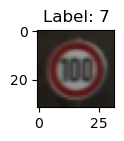

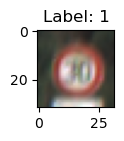

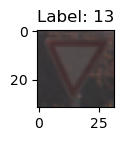

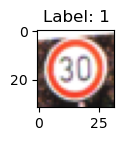

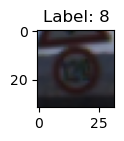

In [44]:
num_images = 5

# 迴圈生成照片
for _ in range(num_images):
    index = random.randint(0, len(x_train) - 1)
    image = x_train[index].squeeze()

    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    plt.title(f"Label: {y_train[index]}")
    plt.show()

In [45]:
class_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
               'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',
               'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons',
               'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles',
               'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
               'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
               'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
               'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead',
               'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
               'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons']

## 資料視覺化

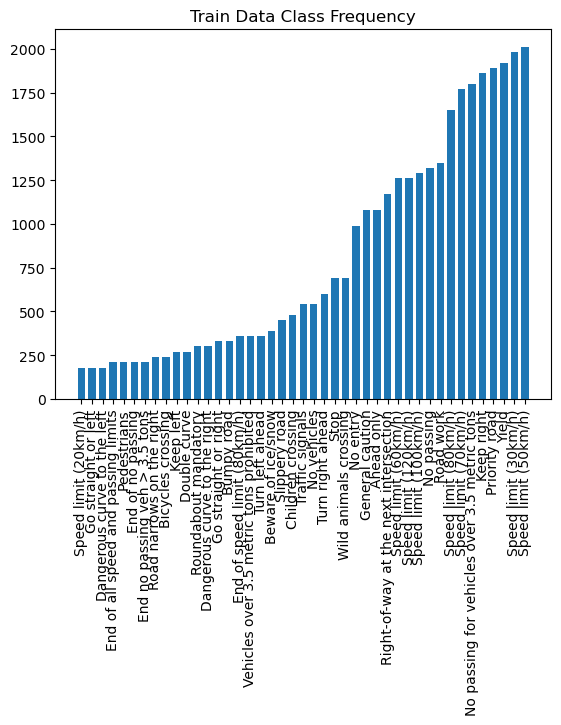

In [12]:
#train data統計
hist, bins = np.histogram(y_train, bins=len(class_names))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# 將直方圖和類別名稱一起按照類別數量排序
sorted_indices = np.argsort(hist)
sorted_hist = hist[sorted_indices]
sorted_class_names = np.array(class_names)[sorted_indices]

plt.title("Train Data Class Frequency")
plt.bar(center, sorted_hist, align='center', width=width)
plt.xticks(center, sorted_class_names, rotation='vertical')
plt.show()

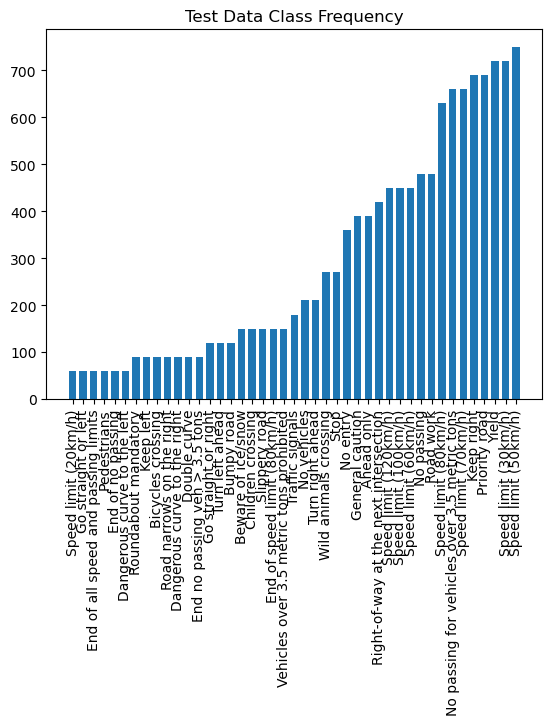

In [13]:
#test data統計
hist, bins = np.histogram(y_test, bins=len(class_names))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# 將直方圖和類別名稱一起按照類別數量排序
sorted_indices = np.argsort(hist)
sorted_hist = hist[sorted_indices]
sorted_class_names = np.array(class_names)[sorted_indices]

plt.title("Test Data Class Frequency")
plt.bar(center, sorted_hist, align='center', width=width)
plt.xticks(center, sorted_class_names, rotation='vertical')
plt.show()

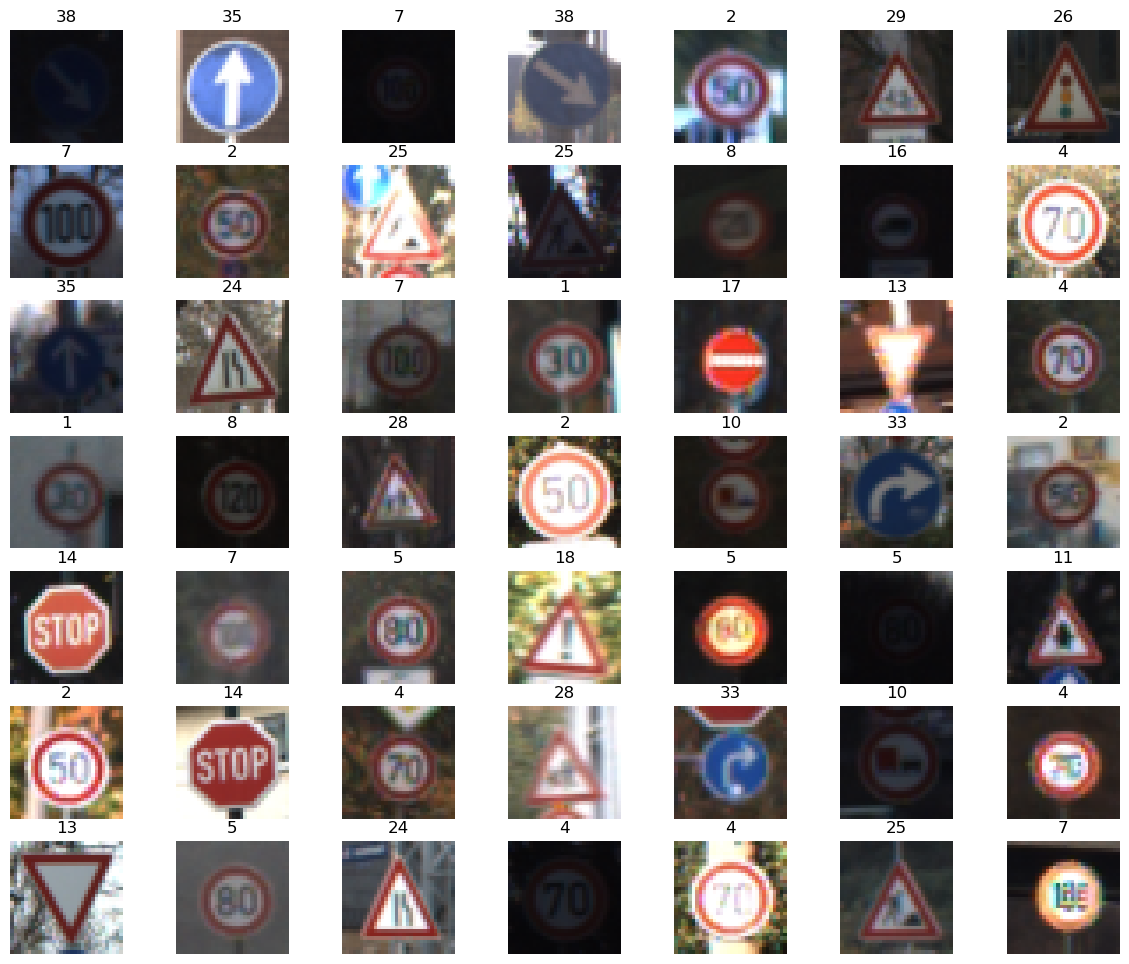

In [15]:
fig, axs = plt.subplots(7, 7, figsize=(15,12))
fig.subplots_adjust(hspace = .2, wspace = .001)
axs = axs.ravel()
for i in range(49):
    index = random.randint(0, len(x_train))
    image = x_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

## 模型

### Lenet-5

In [46]:
import pandas as pd
def getSignNames():
    return pd.read_csv('./signnames.csv').values

In [47]:
print(x_test)

[[[[116 139 174]
   [116 137 171]
   [118 138 172]
   ...
   [ 98 114 143]
   [ 97 121 147]
   [ 85 105 130]]

  [[115 142 176]
   [115 140 174]
   [117 141 175]
   ...
   [119 143 176]
   [120 141 173]
   [120 139 171]]

  [[117 141 174]
   [117 142 175]
   [114 140 172]
   ...
   [120 144 179]
   [122 144 179]
   [120 143 177]]

  ...

  [[117 137 167]
   [115 134 164]
   [117 135 164]
   ...
   [115 137 169]
   [116 136 168]
   [118 139 172]]

  [[116 136 166]
   [114 134 168]
   [113 131 166]
   ...
   [113 135 167]
   [117 136 165]
   [115 139 167]]

  [[112 135 167]
   [110 134 165]
   [119 135 165]
   ...
   [115 138 167]
   [117 138 167]
   [114 140 170]]]


 [[[ 59  70  61]
   [ 87  80  63]
   [ 92  81  63]
   ...
   [ 77  64  67]
   [ 71  65  67]
   [ 74  69  68]]

  [[ 59  68  58]
   [ 94  83  65]
   [ 95  80  62]
   ...
   [ 77  64  66]
   [ 92  69  70]
   [ 85  68  68]]

  [[ 56  68  58]
   [ 90  84  67]
   [ 95  82  64]
   ...
   [ 72  65  66]
   [ 80  67  69]
   [ 79  69

In [48]:
#Converting the labels into one hot encoding
total_classes = 43
y_train_onehot = keras.utils.to_categorical(y_train, total_classes)
y_test_onehot = keras.utils.to_categorical(y_test, total_classes)
y_valid_onehot = keras.utils.to_categorical(y_valid, total_classes)

print(y_train_onehot.shape)
print(y_test_onehot.shape)
print(y_valid_onehot.shape)

(34799, 43)
(12630, 43)
(4410, 43)


#### 模型建置與編譯

In [49]:
from tensorflow import keras
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [50]:
height = 32
width = 32
channels = 3
model_lenet5 = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='tanh', input_shape=(height,width,channels)),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=43, activation='softmax'),
])

In [51]:
model_lenet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [52]:
model_lenet5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 訓練模型


In [53]:
epochs = 20
history = model_lenet5.fit(x_train, y_train_onehot, batch_size=32, epochs=epochs,
validation_data=(x_valid, y_valid_onehot))

Epoch 1/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.7237 - accuracy: 0.8161 - val_loss: 0.3560 - val_accuracy: 0.8961
Epoch 2/20
1088/1088 [==============================] - 11s 10ms/step - loss: 0.2012 - accuracy: 0.9490 - val_loss: 0.3767 - val_accuracy: 0.8916
Epoch 3/20
1088/1088 [==============================] - 10s 9ms/step - loss: 0.1536 - accuracy: 0.9586 - val_loss: 0.3525 - val_accuracy: 0.8975
Epoch 4/20
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1009 - accuracy: 0.9738 - val_loss: 0.3586 - val_accuracy: 0.9007
Epoch 5/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.0807 - accuracy: 0.9787 - val_loss: 0.3023 - val_accuracy: 0.9188
Epoch 6/20
1088/1088 [==============================] - 10s 9ms/step - loss: 0.0662 - accuracy: 0.9814 - val_loss: 0.3519 - val_accuracy: 0.9095
Epoch 7/20
1088/1088 [==============================] - 10s 9ms/step - loss: 0.0602 - accuracy: 0.9831 - val_loss: 0.3442 - va

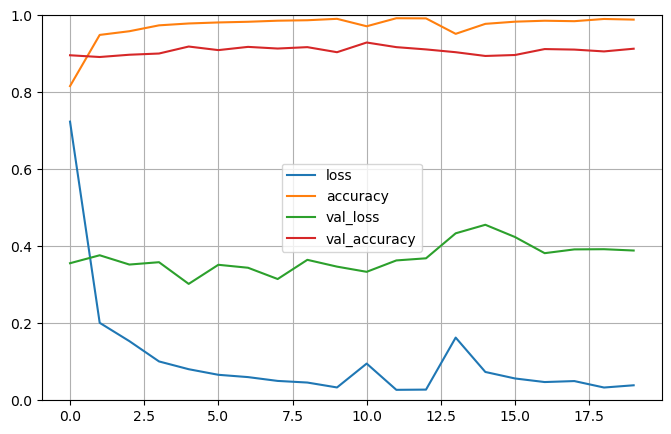

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

#### test data用lenet-5的準確度

In [55]:
# 使用 evaluate 方法獲取測試集上的損失值和準確度
loss, accuracy = model_lenet5.evaluate(x_test, y_test_onehot)

# 打印測試集上的準確度
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 使用模型進行預測
predictions = model_lenet5.predict(x_test)
predicted_class_ids = predictions.argmax(axis=1)

# 將 predicted_class_ids 轉換為 Python list
predicted_class_ids_list = list(predicted_class_ids)

# 使用列表推導式獲取預測結果的標籤名稱
predicted_sign_names = [getSignNames()[getSignNames()[:, 0] == int(class_id), 1][0] for class_id in predicted_class_ids_list]

# 打印預測結果
for i, sign_name in enumerate(predicted_sign_names):
    print(f"Sample {i + 1}: Predicted ClassId = {predicted_class_ids_list[i]}, SignName = {sign_name}")




395/395 [==============================] - 2s 5ms/step - loss: 0.4778 - accuracy: 0.8948
Test Accuracy: 89.48%
395/395 [==============================] - 2s 4ms/step
Sample 1: Predicted ClassId = 16, SignName = Vehicles over 3.5 metric tons prohibited
Sample 2: Predicted ClassId = 1, SignName = Speed limit (30km/h)
Sample 3: Predicted ClassId = 38, SignName = Keep right
Sample 4: Predicted ClassId = 33, SignName = Turn right ahead
Sample 5: Predicted ClassId = 11, SignName = Right-of-way at the next intersection
Sample 6: Predicted ClassId = 38, SignName = Keep right
Sample 7: Predicted ClassId = 18, SignName = General caution
Sample 8: Predicted ClassId = 12, SignName = Priority road
Sample 9: Predicted ClassId = 25, SignName = Road work
Sample 10: Predicted ClassId = 35, SignName = Ahead only
Sample 11: Predicted ClassId = 12, SignName = Priority road
Sample 12: Predicted ClassId = 7, SignName = Speed limit (100km/h)
Sample 13: Predicted ClassId = 21, SignName = Double curve
Sample 1

### CNN


In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.preprocessing import image
from matplotlib import pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [28]:

height = 32
width = 32
batch_size = 64
epochs = 10
train_data_dir = 'traffic-signs-data/train.p'  # 训练数据集的文件夹路径
valid_data_dir = 'traffic-signs-data/valid.p'  # 验证数据集的文件夹路径
num_classes = 43  # 类别数量，根据你的问题设置


In [31]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 加载Pickle文件并准备数据
train_file = './traffic-signs-data/train.p'
test_file = './traffic-signs-data/test.p'
valid_file = './traffic-signs-data/valid.p'


with open(train_file, mode='rb') as f:
    train_data = pickle.load(f)

with open(test_file, mode='rb') as f:
    test_data = pickle.load(f)

with open(valid_file, mode='rb') as f:
    valid_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']

# 对图像数据进行归一化
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

# 加载分类 ID 到分类名称的映射
signnames_df = pd.read_csv('signnames.csv')
class_id_to_name = signnames_df.set_index('ClassId')['SignName'].to_dict()
num_classes = len(class_id_to_name)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [32]:
# 定义模型
height, width, channels = 32, 32, 3

modelc = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(num_classes, activation='softmax')
])

# 编译模型
modelc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
print(modelc.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)         

In [35]:
# 数据增强
batch_size = 64
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# 训练模型
epochs = 20
history1 = modelc.fit(train_generator, epochs=epochs, validation_data=(X_valid, y_valid))

# 评估模型
test_loss, test_accuracy = modelc.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

Epoch 1/20
544/544 [==============================] - 47s 85ms/step - loss: 1.0527 - accuracy: 0.7084 - val_loss: 0.8163 - val_accuracy: 0.7279
Epoch 2/20
544/544 [==============================] - 43s 79ms/step - loss: 0.2144 - accuracy: 0.9337 - val_loss: 0.1899 - val_accuracy: 0.9460
Epoch 3/20
544/544 [==============================] - 46s 84ms/step - loss: 0.1384 - accuracy: 0.9577 - val_loss: 0.1026 - val_accuracy: 0.9710
Epoch 4/20
544/544 [==============================] - 43s 80ms/step - loss: 0.0914 - accuracy: 0.9716 - val_loss: 0.1618 - val_accuracy: 0.9558
Epoch 5/20
544/544 [==============================] - 43s 79ms/step - loss: 0.0862 - accuracy: 0.9735 - val_loss: 0.1172 - val_accuracy: 0.9696
Epoch 6/20
544/544 [==============================] - 46s 84ms/step - loss: 0.0792 - accuracy: 0.9749 - val_loss: 0.2098 - val_accuracy: 0.9433
Epoch 7/20
544/544 [==============================] - 44s 81ms/step - loss: 0.0697 - accuracy: 0.9776 - val_loss: 0.1069 - val_accuracy:

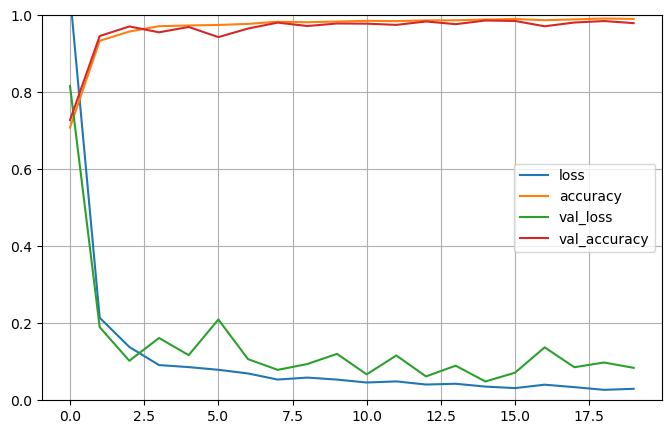

In [36]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [37]:
# 评估模型
test_loss, test_accuracy = modelc.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy*100:.2f}%')


395/395 - 4s - loss: 0.1096 - accuracy: 0.9748 - 4s/epoch - 11ms/step
Test loss: 0.1096
Test accuracy: 97.48%
